In [1]:
from glob import glob
import numpy as np
import rasterio as rio
import os

# Importing dataset

In [2]:
root = '.\\data\\processed_3months_data\\train'

In [3]:
fire = glob(os.path.join(root, "fire", '*.png'))
nofire = glob(os.path.join(root, "nofire", '*.png'))

In [4]:
X = []
y = []
for i in fire:
    with rio.open(i, 'r') as f:
        X.append(f.read(1))
    y.append(1)
for i in nofire:
    with rio.open(i, 'r') as f:
        X.append(f.read(1))
    y.append(0)

C:\Users\ASHIK\anaconda3\lib\site-packages\rasterio\__init__.py:228: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


# stack data

In [5]:
X = np.stack(X)
y = np.array(y)

# Flatten image array

In [6]:
n_samples = X.shape[0]
X_data = X.reshape((n_samples, -1))

# Data normalization

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_data = sc.fit_transform(X_data)

# Split the dataset into train and test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.2, random_state = 42)

# declare class name

In [9]:
class_names = ['no fire', 'fire']

# <span style="color:red;">SVM classifier</span>

In [10]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', random_state=0)
svm_classifier.fit(X_train,y_train)
svm_predict = svm_classifier.predict(X_test)

Confusion matrix : 
 [[112  94]
 [182 304]]
Accuracy Score :  0.6011560693641619
Classification report : 
               precision    recall  f1-score   support

           0       0.38      0.54      0.45       206
           1       0.76      0.63      0.69       486

    accuracy                           0.60       692
   macro avg       0.57      0.58      0.57       692
weighted avg       0.65      0.60      0.62       692



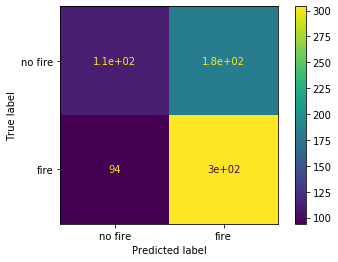

In [11]:
from sklearn import metrics
print("Confusion matrix : \n",metrics.confusion_matrix(svm_predict,y_test))
print("Accuracy Score : ",metrics.accuracy_score(svm_predict,y_test))
print("Classification report : \n",metrics.classification_report(svm_predict,y_test))
metrics.plot_confusion_matrix(svm_classifier, X_test, y_test,display_labels=class_names)

# <span style="color:red;">KNN classifier</span>

In [12]:
neighbors = list(range(2,9,1))

For k =  2
Confusion matrix : 
 [[205 258]
 [ 89 140]]
Accuracy Score :  0.4985549132947977
Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.44      0.54       463
           1       0.35      0.61      0.45       229

    accuracy                           0.50       692
   macro avg       0.52      0.53      0.49       692
weighted avg       0.58      0.50      0.51       692



For k =  3
Confusion matrix : 
 [[147 177]
 [147 221]]
Accuracy Score :  0.5317919075144508
Classification report : 
               precision    recall  f1-score   support

           0       0.50      0.45      0.48       324
           1       0.56      0.60      0.58       368

    accuracy                           0.53       692
   macro avg       0.53      0.53      0.53       692
weighted avg       0.53      0.53      0.53       692



For k =  4
Confusion matrix : 
 [[193 254]
 [101 144]]
Accuracy Score :  0.4869942196531792
Classification

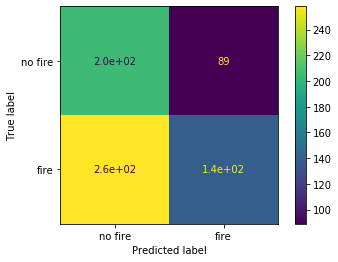

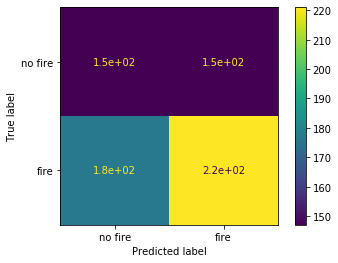

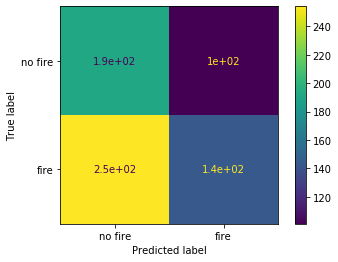

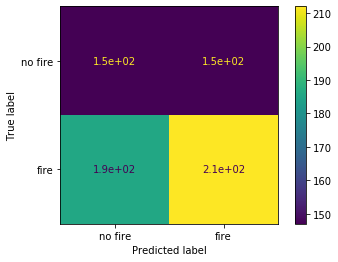

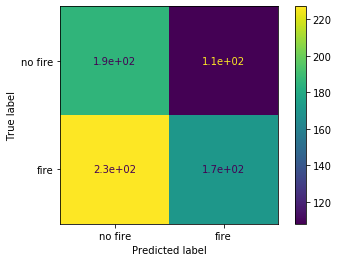

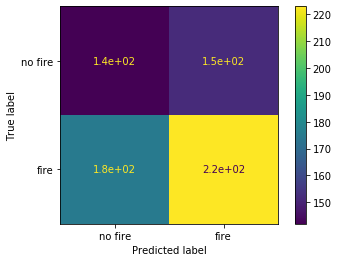

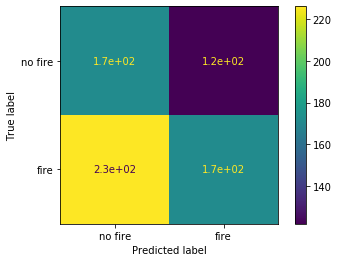

In [13]:
from sklearn.neighbors import KNeighborsClassifier

for k in neighbors:
    print("For k = ",k)
    knn_classifier = KNeighborsClassifier(n_neighbors = k, p=2)
    knn_classifier.fit(X_train, y_train)
    knn_pred = knn_classifier.predict(X_test)
    print("Confusion matrix : \n",metrics.confusion_matrix(knn_pred,y_test))
    print("Accuracy Score : ",metrics.accuracy_score(knn_pred,y_test))
    print("Classification report : \n",metrics.classification_report(knn_pred,y_test))
    metrics.plot_confusion_matrix(knn_classifier, X_test, y_test,display_labels=class_names)
    print("\n")

# <span style="color:red;">Random Forest classifier</span>

In [14]:
from sklearn.ensemble import RandomForestClassifier
rr_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )
rr_classifier.fit(X_train,y_train)
rr_pred = rr_classifier.predict(X_test)

Confusion matrix : 
 [[166  80]
 [128 318]]
Accuracy Score :  0.6994219653179191
Classification report : 
               precision    recall  f1-score   support

           0       0.56      0.67      0.61       246
           1       0.80      0.71      0.75       446

    accuracy                           0.70       692
   macro avg       0.68      0.69      0.68       692
weighted avg       0.72      0.70      0.70       692



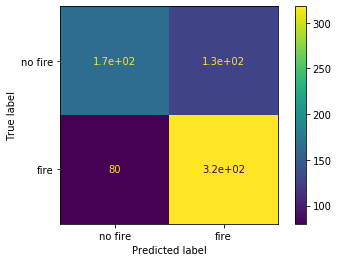

In [15]:
from sklearn import metrics
print("Confusion matrix : \n",metrics.confusion_matrix(rr_pred,y_test))
print("Accuracy Score : ",metrics.accuracy_score(rr_pred,y_test))
print("Classification report : \n",metrics.classification_report(rr_pred,y_test))
metrics.plot_confusion_matrix(rr_classifier, X_test, y_test,display_labels=class_names)